In [1]:
from mediapipe.framework.formats.landmark_pb2 import NormalizedLandmarkList
from matplotlib import pyplot as plt
import mediapipe as mp
import pandas as pd
import numpy as np
import detect
import os

drawing_util = mp.solutions.drawing_utils
drawing_style = mp.solutions.drawing_styles
HAND_CONNECTION = mp.solutions.hands.HAND_CONNECTIONS
POSE_CONNECTION = mp.solutions.pose.POSE_CONNECTIONS

In [2]:
filename="dataset/LSA64/001_001_001.mp4"
frame_map = detect.FrameMap(filename)
frames = frame_map.video2frames(interval=1)
coordinates, ignored = frame_map.frames2coordinates(frames, min_tracking_confidence=0.5)
frames = frame_map.remove_frames(frames, ignored)
print("frames processed: ", frames.shape)

frames processed:  (16, 1080, 1920, 3)


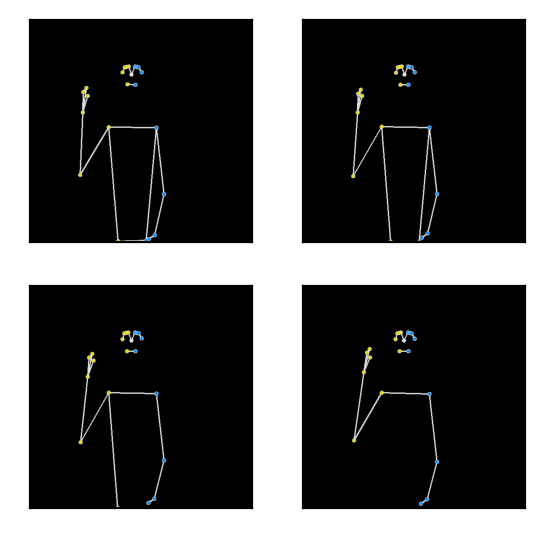

In [6]:
plt.figure(figsize=(5, 5), dpi=200)
for i in range(2):
    for j in range(2):
        # background = cv2.resize(frames[i*3+j], (500, 500))
        background = np.zeros((500, 500, 3))
        landmarks = NormalizedLandmarkList
        landmarks.landmark = coordinates[(i*2+j)*3][:33]
        drawing_util.draw_landmarks(background, landmarks, POSE_CONNECTION, drawing_style.get_default_pose_landmarks_style())
        plt.subplot(3, 3, i*3+j+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(background.astype(np.uint8))
plt.show()

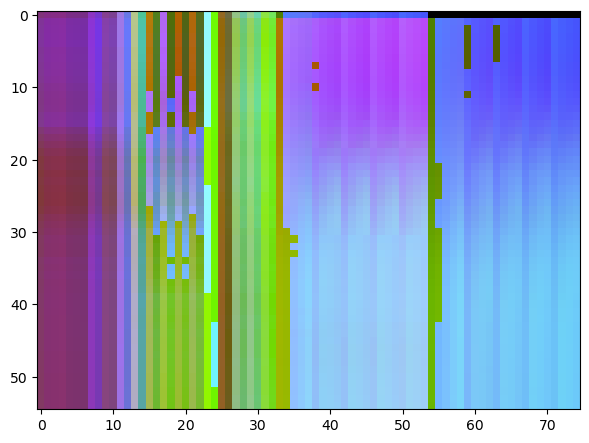

In [4]:
features = np.array([[[dot.x, dot.y, dot.z] if dot else [0] * 3 for dot in dots] for dots in coordinates], dtype="float32")
plt.figure(figsize=(7, 6), dpi=100)
plt.imshow((features*255).astype(np.uint8))
plt.show()